In [21]:
# import librarie
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# set style for seaborn
sns.set_style('darkgrid')

# set pandas options to display all columns
pd.set_option('display.max_columns', 200)

# dataset URL
URL = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# define target variable
TARGET = 'Churn'  

In [22]:
# load dataset
df = pd.read_csv(URL)

# display first five rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# check some informations of the dataset
print(f"Dataset dimensions: \n{df.shape}\n")  # (rows, columns)

print(f'Name of the columns: \n{df.columns}\n') # list of column names

print(f'Datatypes of the columns: \n{df.dtypes}\n')  # data types of each column

print(f'Check unique values for each column: \n{df.nunique()}')  # number of unique values for each column

Dataset dimensions: 
(7043, 21)

Name of the columns: 
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Datatypes of the columns: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Tota

In [24]:
# check the percentage of missing values
print(f'Missing values percentage (per column):\n{(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)}')

Missing values percentage (per column):
customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64


In [25]:
# data handling and cleaning steps would go here
def str_to_float(x):
    '''
    Convert string to float, return NaN if conversion fails
    '''
    try:
        return float(x)
    except ValueError:
        return np.nan

In [26]:
# create a copy of the original dataframe for cleaning
df_cleaned = df.copy()

# exclude customerID column as it is not useful for analysis
df_cleaned = df_cleaned.drop(columns=['customerID'])

# apply str_to_float functino in 'TotalCharges' column
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].apply(str_to_float)

# check again for missing values in 'TotalCharges' after conversion
print(f'Missing values in TotalCharges after conversion: {df_cleaned["TotalCharges"].isnull().sum()}')

# impute missing values in 'TotalCharges' with the median
median_total_charges = df_cleaned['TotalCharges'].median()
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].fillna(median_total_charges)

Missing values in TotalCharges after conversion: 11


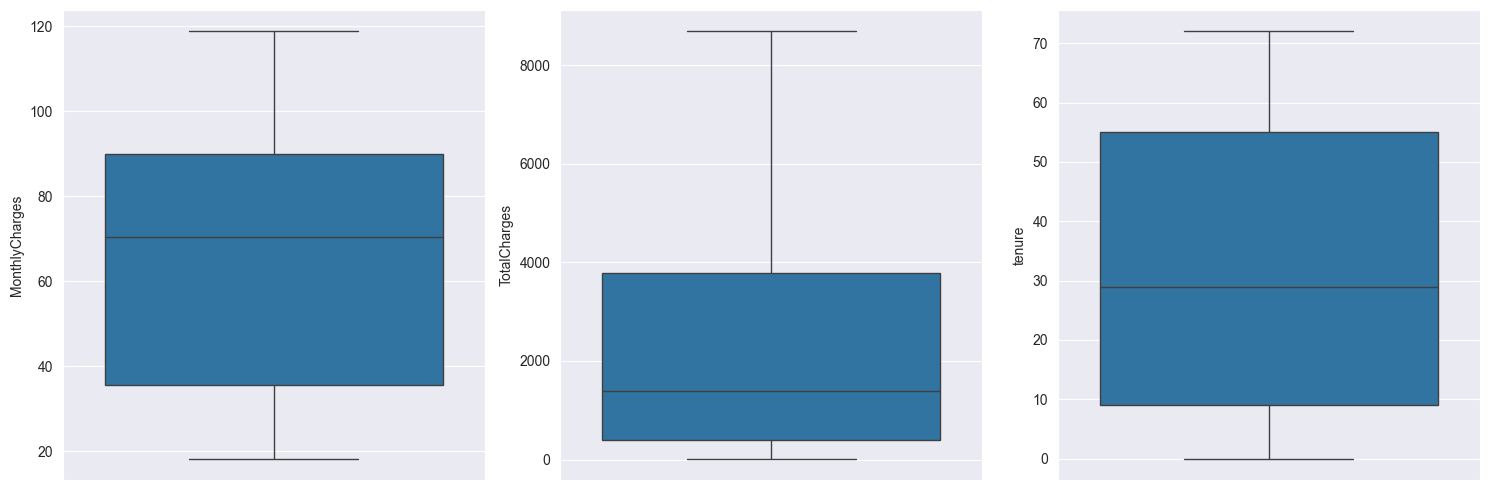

In [27]:
# check for outlier for 'tenure', 'TotalCharges' and 'MonthlyCharges'
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(df_cleaned['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_cleaned['TotalCharges'], ax=ax[1])
sns.boxplot(df_cleaned['tenure'], ax=ax[2])

plt.tight_layout()

plt.savefig('boxplot-outliers-churn.jpeg')

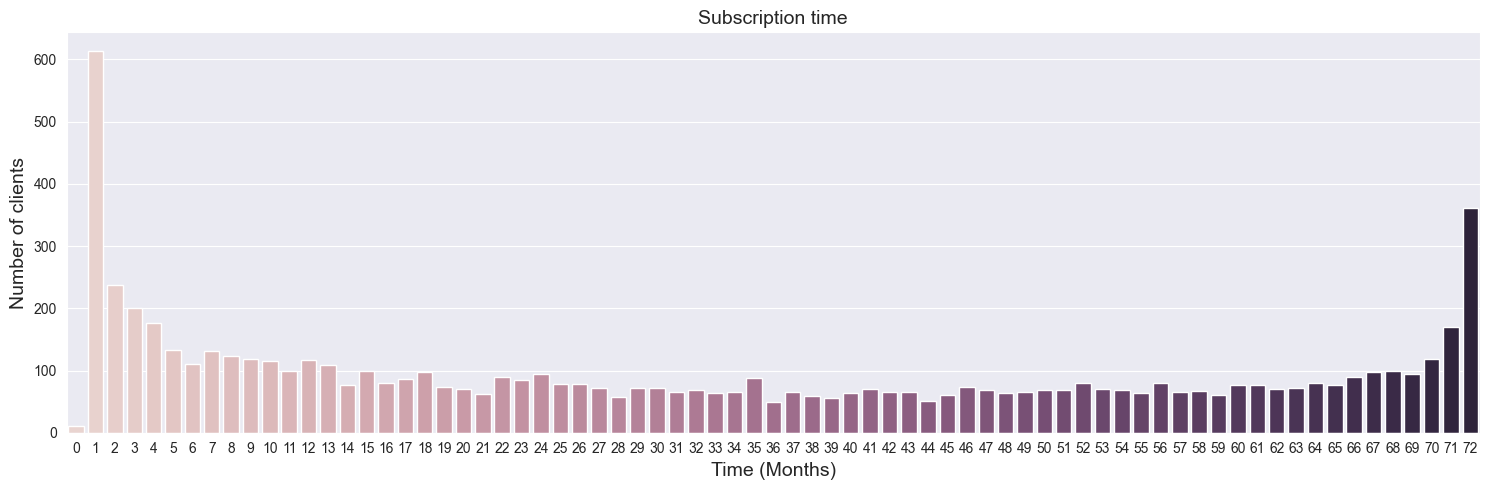

In [28]:
# plot customer retention to analyze how long clients stay subscribed
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=df_cleaned['tenure'], data=df_cleaned, hue=df_cleaned['tenure'], legend=False, ax=ax)

# define titles and labels
ax.set_title('Subscription time', fontsize=14)
ax.set_ylabel('Number of clients', fontsize=14)
ax.set_xlabel('Time (Months)', fontsize=14)

plt.tight_layout()

plt.savefig('fidelity.jpeg', dpi=300)

In [29]:
# check unique values in categorical columns
np.unique(df_cleaned.select_dtypes(include=['object']).values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

In [30]:
df_cleaned.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

In [36]:
df_cleaned["Churn"] = df_cleaned["Churn"].str.strip().str.lower().map({"yes": 1, "no": 0})

In [37]:
# check the statistical summary of numerical columns
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.000,1.00,1.00


In [75]:
# churn rate in the dataset
print("Churn rate:", (df_cleaned["Churn"].mean() * 100).round(2), "%")

Churn rate: 26.54 %


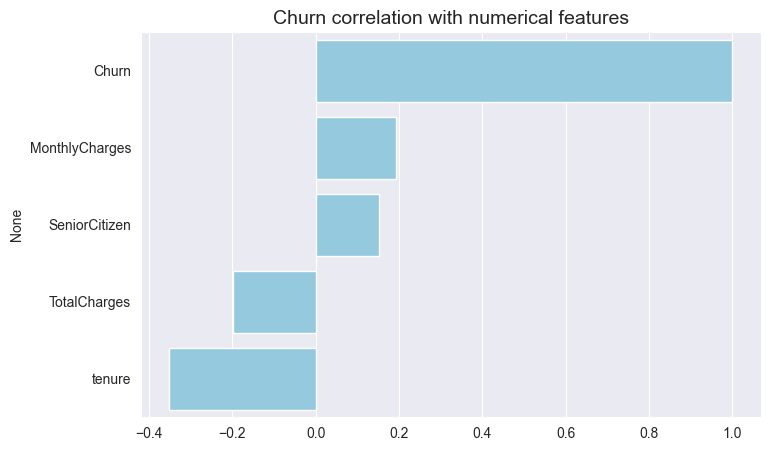

In [ ]:
# Correlation analysis between numerical features and churn
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.drop("Churn")
corr = df_cleaned[num_cols.tolist() + ["Churn"]].corr()["Churn"].sort_values(ascending=False)

# plot correlation
plt.figure(figsize=(8,5))
sns.barplot(x=corr.values, y=corr.index, color="skyblue")
plt.title("Churn correlation with numerical features", fontsize=14)
plt.savefig('corr_churn.jpeg', dpi=300)
plt.show();

In [76]:
# statistical tests to compare means of numerical features between churned and non-churned customers
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    churn = df_cleaned.loc[df_cleaned["Churn"] == 1, col]
    no_churn = df_cleaned.loc[df_cleaned["Churn"] == 0, col]
    stat, p = stats.ttest_ind(churn, no_churn, equal_var=False)
    print(f"{col}: churn mean={churn.mean():.2f}, no churn={no_churn.mean():.2f}, p={p:.6f}")

tenure: churn mean=17.98, no churn=37.57, p=0.000000
MonthlyCharges: churn mean=74.44, no churn=61.27, p=0.000000
TotalCharges: churn mean=1531.80, no churn=2552.88, p=0.000000


In [85]:
def cohen_d(a, b):
    na, nb = len(a), len(b)
    sa2, sb2 = np.var(a, ddof=1), np.var(b, ddof=1)
    s_pooled = np.sqrt(((na-1)*sa2 + (nb-1)*sb2) / (na+nb-2))
    return (np.mean(a) - np.mean(b)) / s_pooled

for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    a = df_cleaned.loc[df_cleaned["Churn"]==1, col]
    b = df_cleaned.loc[df_cleaned["Churn"]==0, col]
    d = cohen_d(a, b)
    print(f"{col}: Cohen's d = {d:.2f}")

tenure: Cohen's d = -0.85
MonthlyCharges: Cohen's d = 0.45
TotalCharges: Cohen's d = -0.46


In [87]:
from scipy.stats import chi2_contingency
import pandas as pd

cat_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns
out = []

for col in cat_cols:
    tab = pd.crosstab(df_cleaned[col], df_cleaned["Churn"])
    chi2, p, dof, ex = chi2_contingency(tab)
    churn_rate = (tab[1] / tab.sum(1) * 100).sort_values(ascending=False)
    out.append({
        "Feature": col,
        "p-value": p,
        "Highest Churn (%)": churn_rate.iloc[0],
        "Category": churn_rate.index[0]
    })

chi_df = pd.DataFrame(out).sort_values("p-value")

# formatar visualmente
chi_df["p-value"] = chi_df["p-value"].apply(lambda x: f"{x:.2e}")  # notação científica curta
chi_df["Highest Churn (%)"] = chi_df["Highest Churn (%)"].apply(lambda x: f"{x:.1f}%")

chi_df.head(10)

,Feature,p-value,Highest Churn (%),Category
12,Contract,5.86e-258,42.7%,Month-to-month
5,InternetService,9.57e-160,41.9%,Fiber optic
14,PaymentMethod,3.68e-140,45.3%,Electronic check
13,PaperlessBilling,4.07e-58,33.6%,Yes
6,OnlineSecurity,1.23e-46,31.3%,No
9,TechSupport,2.92e-43,31.2%,No
2,Dependents,4.92e-43,31.3%,No
1,Partner,2.14e-36,33.0%,No
7,OnlineBackup,6.21e-12,29.2%,No
8,DeviceProtection,3.32e-08,28.7%,No


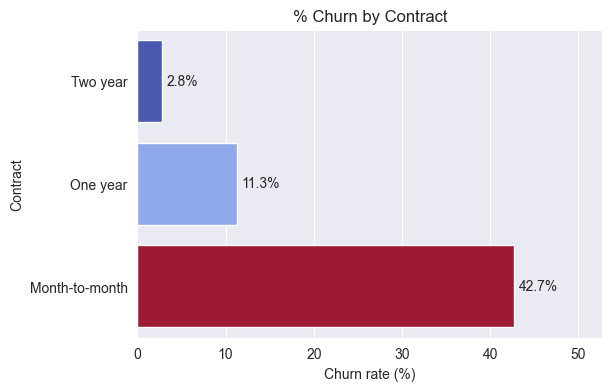

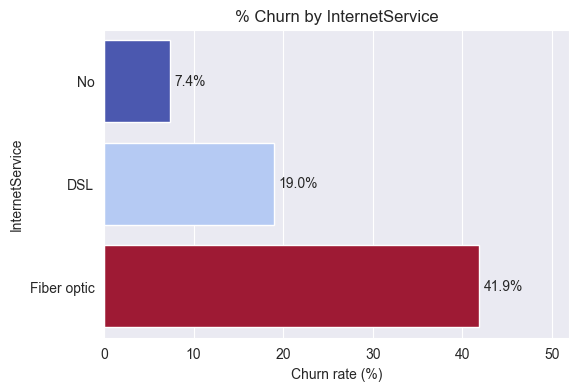

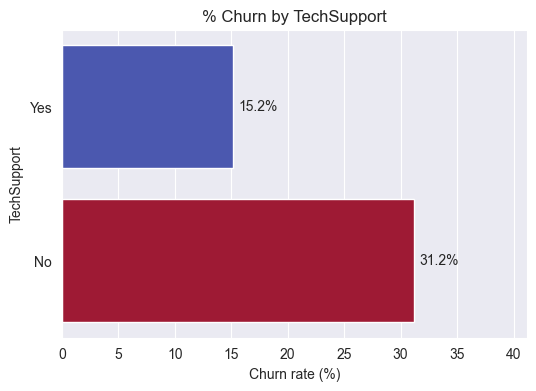

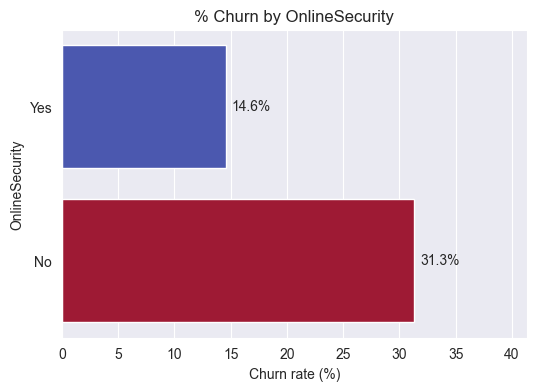

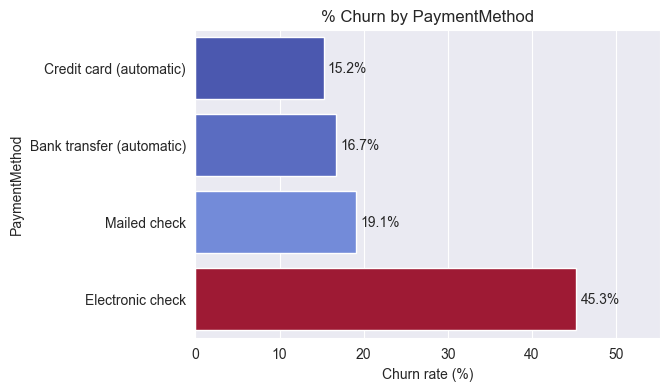

In [91]:
# plot churn rate for top categorical features
top_features = ["Contract", "InternetService", "TechSupport", "OnlineSecurity", "PaymentMethod"]

top_features = ["Contract", "InternetService", "TechSupport", "OnlineSecurity", "PaymentMethod"]

for col in top_features:
    plt.figure(figsize=(6,4))
    prop = (df_cleaned.groupby(col)["Churn"].mean()*100).sort_values()

    ax = sns.barplot(x=prop.values, y=prop.index, hue=prop.values, palette="coolwarm", legend=False)

    # add formatted values next to bars
    for i, v in enumerate(prop.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va="center", fontsize=10)

    plt.title(f"% Churn by {col}")
    plt.xlabel("Churn rate (%)")
    plt.xlim(0, prop.values.max() + 10)
    plt.savefig(f'churn_rate{col}.jpeg', dpi=300)
    plt.show();

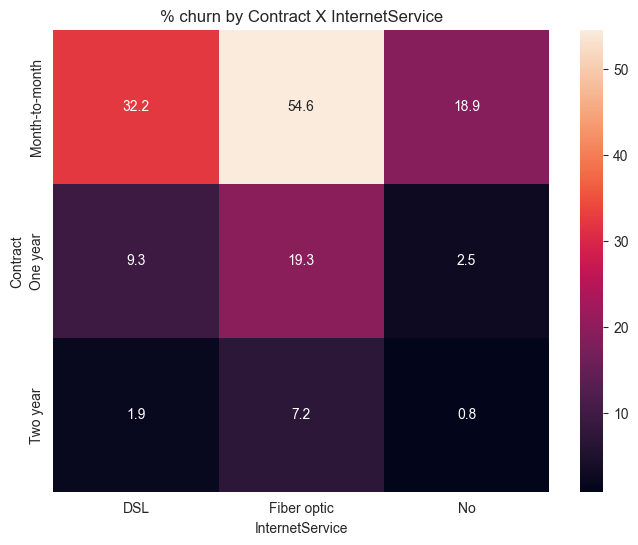

<Figure size 640x480 with 0 Axes>

In [79]:
# heatmap to show interaction between 'Contract' and 'InternetService' on churn rate
plt.figure(figsize=(8,6))
tmp = df_cleaned.pivot_table(values="Churn", index="Contract", columns="InternetService", aggfunc="mean")*100
sns.heatmap(tmp, annot=True, fmt=".1f")
plt.title("% churn by Contract X InternetService"); plt.show()
plt.savefig('churn_corr_contract_internet.jpeg', dpi=300)
plt.show();